In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('TRAIN.csv')
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
train.shape

(188340, 10)

In [4]:
train.duplicated().sum()

0

In [5]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [6]:
test = pd.read_csv('TEST_FINAL.csv')
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [7]:
test.shape

(22265, 8)

In [8]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [10]:
train['Store_Type'].value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [11]:
train['Location_Type'].value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [12]:
train['Region_Code'].value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [13]:
train['Discount'].value_counts()

No     104051
Yes     84289
Name: Discount, dtype: int64

In [14]:
train['Date'].value_counts()

2019-04-15    365
2018-07-10    365
2018-04-22    365
2018-03-09    365
2019-01-18    365
             ... 
2019-01-20    365
2018-07-16    365
2018-03-20    365
2018-12-03    365
2019-01-02    365
Name: Date, Length: 516, dtype: int64

In [15]:
test['Store_Type'].value_counts()

S1    10492
S4     5429
S2     3416
S3     2928
Name: Store_Type, dtype: int64

In [16]:
test['Location_Type'].value_counts()

L1    10065
L2     5734
L3     3538
L5     1647
L4     1281
Name: Location_Type, dtype: int64

In [17]:
test['Region_Code'].value_counts()

R1    7564
R2    6405
R3    5246
R4    3050
Name: Region_Code, dtype: int64

In [18]:
test['Discount'].value_counts()

No     12773
Yes     9492
Name: Discount, dtype: int64

In [19]:
test['Date'].value_counts()

2019-06-12    365
2019-07-04    365
2019-06-09    365
2019-06-27    365
2019-06-13    365
             ... 
2019-07-21    365
2019-06-03    365
2019-07-12    365
2019-06-04    365
2019-07-20    365
Name: Date, Length: 61, dtype: int64

In [20]:
newtrain = train.copy()
newtest = test.copy()

In [21]:
newtrain['Date'] = pd.to_datetime(newtrain['Date'])
newtest['Date'] = pd.to_datetime(newtest['Date'])

In [22]:
import datetime as dt

In [23]:
newtrain['Month'] = newtrain['Date'].dt.month
newtrain['Year'] = newtrain['Date'].dt.year
newtrain['Day'] = newtrain['Date'].dt.day

In [24]:
newtest['Month'] = newtest['Date'].dt.month
newtest['Year'] = newtest['Date'].dt.year
newtest['Day'] = newtest['Date'].dt.day

In [25]:
newtrain = newtrain.drop(['ID', 'Date', '#Order'], axis = 1)
newtest = newtest.drop(['ID', 'Date'], axis = 1)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
x = ['Store_Type', 'Location_Type', 'Region_Code', 'Discount']
for i in x:
    newtrain[i] = le.fit_transform(newtrain[i])
    newtest[i] = le.fit_transform(newtest[i])

In [28]:
newtrain.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Month,Year,Day
0,1,0,2,0,1,1,7011.84,1,2018,1
1,253,3,1,0,1,1,51789.12,1,2018,1
2,252,2,1,0,1,1,36868.20,1,2018,1
3,251,1,2,0,1,1,19715.16,1,2018,1
4,250,1,2,3,1,1,45614.52,1,2018,1


In [29]:
newtest.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Month,Year,Day
0,171,3,1,2,0,0,6,2019,1
1,172,0,0,0,0,0,6,2019,1
2,173,3,1,0,0,0,6,2019,1
3,174,0,0,3,0,0,6,2019,1
4,170,0,0,1,0,0,6,2019,1


In [30]:
x = newtrain.drop('Sales', axis = 1)
y = newtrain['Sales']

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [32]:
from sklearn.metrics import mean_squared_error

In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

7935.2001967168835


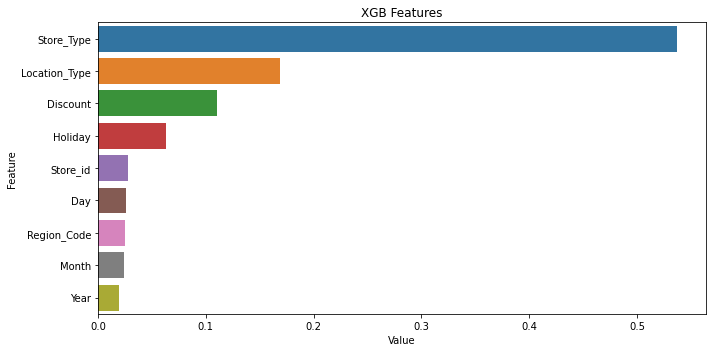

In [42]:
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGB Features')
plt.tight_layout()
plt.show()

In [44]:
x_train = newtrain.drop('Sales', axis = 1)
y_train = newtrain['Sales']
x_test = newtest

In [45]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'ID' : test.ID, 'Sales' : y_pred})
solution.to_csv('Solution.csv', index = False)

In [46]:
x_train = newtrain.drop(['Sales', 'Store_id', 'Day', 'Region_Code', 'Month', 'Year'], axis = 1)
y_train = newtrain['Sales']
x_test = newtest.drop(['Store_id', 'Day', 'Region_Code', 'Month', 'Year'], axis = 1)

In [47]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'ID' : test.ID, 'Sales' : y_pred})
solution.to_csv('XGB.csv', index = False)